In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from shapely.geometry import Point
df = gpd.read_file('/data/acker/ALA/paper2/washu_2021-2023_merged.shp')
df

,index,GEOID,PM25_90th,STATEFP,COUNTYFP,CDVE_rank,ID,Design Val,geometry
0,0,02090,14.333333,02,090,1,02_090,12.1,"POLYGON ((-148.66326 64.59079, -148.64821 64.5..."
1,1,06063,14.200000,06,063,2,06_063,14.0,"POLYGON ((-121.49703 40.43702, -121.49487 40.4..."
2,2,06107,12.933334,06,107,4,06_107,15.7,"POLYGON ((-119.56647 36.49434, -119.56366 36.4..."
3,3,06023,12.633334,06,023,5,06_023,6.9,"POLYGON ((-124.4086 40.4432, -124.39664 40.462..."
4,4,06029,12.599999,06,029,6,06_029,16.2,"POLYGON ((-120.19437 35.78936, -120.00308 35.7..."
...,...,...,...,...,...,...,...,...,...
531,531,02020,4.133333,02,020,3118,02_020,5.1,"MULTIPOLYGON (((-150.07348 61.15834, -150.0691..."
532,532,02110,3.900000,02,110,3128,02_110,4.6,"MULTIPOLYGON (((-134.66932 58.33327, -134.6675..."
533,533,15001,3.633333,15,001,3133,15_001,4.4,"POLYGON ((-156.06147 19.72813, -156.06076 19.7..."
534,534,15009,3.556667,15,009,3136,15_009,4.0,"MULTIPOLYGON (((-156.69742 20.91637, -156.6957..."


In [2]:
df = df.rename(columns={'Design Val':'Design Value'})

In [3]:
#upload shapefile of U.S. counties
counties = gpd.read_file('/data/acker/shapefiles/cb_2020_us_county_500k.shp')

In [4]:
# List of state abbreviations for CONUS, Alaska (AK), and Hawaii (HI)
states_to_include = [
    'AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'ID', 'DC',
    'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS',
    'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK',
    'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV',
    'WI', 'WY'
]

# Filter counties to only include rows where STUSPS is in the specified list
counties_conus = counties[counties['STUSPS'].isin(states_to_include)]

# Display the filtered counties
counties_conus

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,NAMELSAD,STUSPS,STATE_NAME,LSAD,ALAND,AWATER,geometry
0,13,031,00350302,0500000US13031,13031,Bulloch,Bulloch County,GA,Georgia,06,1750735216,32827779,"POLYGON ((-82.02684 32.55516, -82.02527 32.558..."
1,13,121,01694833,0500000US13121,13121,Fulton,Fulton County,GA,Georgia,06,1364133162,19666288,"POLYGON ((-84.84931 33.51318, -84.84429 33.514..."
2,13,179,00357095,0500000US13179,13179,Liberty,Liberty County,GA,Georgia,06,1337654102,222884791,"POLYGON ((-81.8244 32.01488, -81.81338 32.0162..."
3,13,189,00348794,0500000US13189,13189,McDuffie,McDuffie County,GA,Georgia,06,666590014,23114032,"POLYGON ((-82.64852 33.60838, -82.64409 33.606..."
4,13,213,01688005,0500000US13213,13213,Murray,Murray County,GA,Georgia,06,892235145,5719644,"POLYGON ((-84.94434 34.68004, -84.9431 34.6804..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3228,41,049,01135860,0500000US41049,41049,Morrow,Morrow County,OR,Oregon,06,5259046087,44372730,"POLYGON ((-120.00631 45.27648, -120.00556 45.3..."
3229,21,073,00516883,0500000US21073,21073,Franklin,Franklin County,KY,Kentucky,06,538312209,10786432,"POLYGON ((-85.02426 38.13059, -85.02299 38.131..."
3230,17,201,01785216,0500000US17201,17201,Winnebago,Winnebago County,IL,Illinois,06,1328792556,15873993,"POLYGON ((-89.40142 42.50043, -89.37175 42.500..."
3231,17,123,00424260,0500000US17123,17123,Marshall,Marshall County,IL,Illinois,06,1001843226,30364348,"POLYGON ((-89.63869 40.98691, -89.63868 40.988..."


In [5]:
counties_conus = counties_conus.drop(["COUNTYNS", 'NAMELSAD', 'LSAD', 'ALAND', 'AWATER', 'AFFGEOID'], axis=1)

In [6]:
counties_conus = counties_conus.to_crs(df.crs)

In [7]:
merged_df = df

In [8]:
merged_df['diff'] =  merged_df['PM25_90th'] - merged_df['Design Value']
merged_df['diff'].describe()

count    536.000000
mean       0.064832
std        1.227862
min       -5.333334
25%       -0.533333
50%        0.133334
75%        0.775000
max        5.733334
Name: diff, dtype: float64

In [9]:
# Define threshold
threshold = 9.0

# Function to classify each row
def classify(row):
    cdv = row['Design Value']
    cdve = row['PM25_90th']
    if cdv > threshold and cdve > threshold:
        return 'TP'
    elif cdv > threshold and cdve <= threshold:
        return 'FP'
    elif cdv <= threshold and cdve > threshold:
        return 'FN'
    else:
        return 'TN'

# Apply the classification
merged_df['classification'] = merged_df.apply(classify, axis=1)

# Print counts
print(merged_df['classification'].value_counts())

# Optional: filter into separate DataFrames
TP = merged_df[merged_df['classification'] == 'TP']
FP = merged_df[merged_df['classification'] == 'FP']
FN = merged_df[merged_df['classification'] == 'FN']
TN = merged_df[merged_df['classification'] == 'TN']
print('TP:',len(TP))
print('FP:',len(FP))
print('FN:', len(FN))
print('TN:',len(TN))

classification
TN    376
TP     63
FP     52
FN     45
Name: count, dtype: int64
TP: 63
FP: 52
FN: 45
TN: 376


In [10]:
import pandas as pd
dvs = pd.read_csv('/data/acker/EPA_DV/site_DVs_2021-2023.csv')
dvs

,State Name,County Name,CBSA Name,CSA Name,EPA Region,AQS Site ID,Local Site Name,Site Latitude,Site Longitude,Valid DV,Invalid DV,2021 Annual Mean Value (µg/m3),2022 Annual Mean Value (µg/m3),2023 Annual Mean Value (µg/m3)
0,Alabama,Baldwin,"Daphne-Fairhope-Foley, AL","Mobile-Daphne-Fairhope, AL",4,10030010,"Fairhope, Alabama",30.497478,-87.880258,7.4,NaN,7.28,7.33,7.60
1,Alabama,Clay,,,4,10270001,Ashland,33.284928,-85.803608,7.3,NaN,6.81,6.89,8.10
2,Alabama,DeKalb,,,4,10491003,Crossville,34.288567,-85.969858,7.8,NaN,7.75,6.86,8.89
3,Alabama,Etowah,"Gadsden, AL",,4,10550010,Gadsden C. College,33.988210,-85.992556,NaN,8.8,8.38,8.20,9.82
4,Alabama,Jefferson,"Birmingham-Hoover, AL","Birmingham-Hoover-Talladega, AL",4,10730023,North Birmingham,33.553056,-86.815000,9.6,NaN,9.71,9.00,10.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1055,Puerto Rico,Fajardo,"San Juan-Carolina-Caguas, PR","San Juan-Carolina, PR",2,720530003,Fajardo,18.383983,-65.618888,NaN,7.1,7.20,7.20,6.86
1056,Puerto Rico,Guayama,"Guayama, PR","San Juan-Carolina, PR",2,720570012,,17.955378,-66.162122,NaN,5.6,7.02,4.17,NaN
1057,Puerto Rico,Guaynabo,"San Juan-Carolina-Caguas, PR","San Juan-Carolina, PR",2,720610005,Guaynabo,18.440095,-66.114460,NaN,7.5,8.00,7.54,7.06
1058,Puerto Rico,Ponce,"Ponce, PR","Ponce-Coamo-Santa Isabel, PR",2,721130004,Residential Area,18.009558,-66.627249,NaN,6.7,6.96,6.74,6.33


In [11]:
dvs.columns

Index(['State Name', 'County Name', 'CBSA Name', 'CSA Name', 'EPA Region',
       'AQS Site ID', 'Local Site Name', 'Site Latitude', 'Site Longitude',
       'Valid DV ', 'Invalid DV', '2021 Annual Mean Value (µg/m3)',
       '2022 Annual Mean Value (µg/m3)', '2023 Annual Mean Value (µg/m3)'],
      dtype='object')

In [12]:
import numpy as np
valid = dvs.dropna(subset=['Valid DV '])
valid

,State Name,County Name,CBSA Name,CSA Name,EPA Region,AQS Site ID,Local Site Name,Site Latitude,Site Longitude,Valid DV,Invalid DV,2021 Annual Mean Value (µg/m3),2022 Annual Mean Value (µg/m3),2023 Annual Mean Value (µg/m3)
0,Alabama,Baldwin,"Daphne-Fairhope-Foley, AL","Mobile-Daphne-Fairhope, AL",4,10030010,"Fairhope, Alabama",30.497478,-87.880258,7.4,NaN,7.28,7.33,7.60
1,Alabama,Clay,,,4,10270001,Ashland,33.284928,-85.803608,7.3,NaN,6.81,6.89,8.10
2,Alabama,DeKalb,,,4,10491003,Crossville,34.288567,-85.969858,7.8,NaN,7.75,6.86,8.89
4,Alabama,Jefferson,"Birmingham-Hoover, AL","Birmingham-Hoover-Talladega, AL",4,10730023,North Birmingham,33.553056,-86.815000,9.6,NaN,9.71,9.00,10.07
5,Alabama,Jefferson,"Birmingham-Hoover, AL","Birmingham-Hoover-Talladega, AL",4,10731005,Mcadory,33.331111,-87.003611,8.4,NaN,8.18,8.02,8.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,Wyoming,Sheridan,"Sheridan, WY",,8,560330002,Sheridan - Police Sta. Slam Site,44.815142,-106.955933,7.0,NaN,6.47,7.73,6.75
1047,Wyoming,Sublette,,,8,560350101,Pinedale Gaseous,42.869824,-109.870760,3.7,NaN,4.68,3.09,3.37
1050,Wyoming,Teton,"Jackson, WY-ID",,8,560391006,Jackson Slam Site,43.457760,-110.797990,3.1,NaN,4.94,2.74,1.71
1051,Wyoming,Teton,"Jackson, WY-ID",,8,560391013,Yellowstone National Park - Old Faithful Snow ...,44.373056,-110.830833,4.0,NaN,5.08,4.06,2.77


In [13]:
valid['geometry'] = gpd.points_from_xy(valid['Site Longitude'], valid['Site Latitude'])
valid = gpd.GeoDataFrame(valid, geometry="geometry", crs="EPSG:4269")
valid

/tmp/ipykernel_396914/3099035182.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['geometry'] = gpd.points_from_xy(valid['Site Longitude'], valid['Site Latitude'])


,State Name,County Name,CBSA Name,CSA Name,EPA Region,AQS Site ID,Local Site Name,Site Latitude,Site Longitude,Valid DV,Invalid DV,2021 Annual Mean Value (µg/m3),2022 Annual Mean Value (µg/m3),2023 Annual Mean Value (µg/m3),geometry
0,Alabama,Baldwin,"Daphne-Fairhope-Foley, AL","Mobile-Daphne-Fairhope, AL",4,10030010,"Fairhope, Alabama",30.497478,-87.880258,7.4,NaN,7.28,7.33,7.60,POINT (-87.88026 30.49748)
1,Alabama,Clay,,,4,10270001,Ashland,33.284928,-85.803608,7.3,NaN,6.81,6.89,8.10,POINT (-85.80361 33.28493)
2,Alabama,DeKalb,,,4,10491003,Crossville,34.288567,-85.969858,7.8,NaN,7.75,6.86,8.89,POINT (-85.96986 34.28857)
4,Alabama,Jefferson,"Birmingham-Hoover, AL","Birmingham-Hoover-Talladega, AL",4,10730023,North Birmingham,33.553056,-86.815000,9.6,NaN,9.71,9.00,10.07,POINT (-86.815 33.55306)
5,Alabama,Jefferson,"Birmingham-Hoover, AL","Birmingham-Hoover-Talladega, AL",4,10731005,Mcadory,33.331111,-87.003611,8.4,NaN,8.18,8.02,8.99,POINT (-87.00361 33.33111)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,Wyoming,Sheridan,"Sheridan, WY",,8,560330002,Sheridan - Police Sta. Slam Site,44.815142,-106.955933,7.0,NaN,6.47,7.73,6.75,POINT (-106.95593 44.81514)
1047,Wyoming,Sublette,,,8,560350101,Pinedale Gaseous,42.869824,-109.870760,3.7,NaN,4.68,3.09,3.37,POINT (-109.87076 42.86982)
1050,Wyoming,Teton,"Jackson, WY-ID",,8,560391006,Jackson Slam Site,43.457760,-110.797990,3.1,NaN,4.94,2.74,1.71,POINT (-110.79799 43.45776)
1051,Wyoming,Teton,"Jackson, WY-ID",,8,560391013,Yellowstone National Park - Old Faithful Snow ...,44.373056,-110.830833,4.0,NaN,5.08,4.06,2.77,POINT (-110.83083 44.37306)


In [14]:
merged_df_2 = gpd.sjoin(valid, merged_df, how="left", predicate="within")
# Count monitors per county (assuming counties have a unique ID, like 'GEOID' or 'county_name')
monitor_counts = merged_df_2.groupby("GEOID").size().reset_index(name='monitor_count')
monitor_counts

,GEOID,monitor_count
0,01003,1
1,01027,1
2,01049,1
3,01073,5
4,01089,1
...,...,...
530,56025,1
531,56029,1
532,56033,1
533,56035,1


In [15]:
# Merge monitor counts into counties GeoDataFrame
counties_with_monitor_counts = merged_df.merge(monitor_counts, on="GEOID", how="left")

# Fill NaNs (counties with 0 monitors)
counties_with_monitor_counts['monitor_count'] = counties_with_monitor_counts['monitor_count'].fillna(1).astype(int)
counties_with_monitor_counts

,index,GEOID,PM25_90th,STATEFP,COUNTYFP,CDVE_rank,ID,Design Value,geometry,diff,classification,monitor_count
0,0,02090,14.333333,02,090,1,02_090,12.1,"POLYGON ((-148.66326 64.59079, -148.64821 64.5...",2.233333,TP,3
1,1,06063,14.200000,06,063,2,06_063,14.0,"POLYGON ((-121.49703 40.43702, -121.49487 40.4...",0.200000,TP,1
2,2,06107,12.933334,06,107,4,06_107,15.7,"POLYGON ((-119.56647 36.49434, -119.56366 36.4...",-2.766666,TP,1
3,3,06023,12.633334,06,023,5,06_023,6.9,"POLYGON ((-124.4086 40.4432, -124.39664 40.462...",5.733334,FN,1
4,4,06029,12.599999,06,029,6,06_029,16.2,"POLYGON ((-120.19437 35.78936, -120.00308 35.7...",-3.600001,TP,5
...,...,...,...,...,...,...,...,...,...,...,...,...
531,531,02020,4.133333,02,020,3118,02_020,5.1,"MULTIPOLYGON (((-150.07348 61.15834, -150.0691...",-0.966667,TN,1
532,532,02110,3.900000,02,110,3128,02_110,4.6,"MULTIPOLYGON (((-134.66932 58.33327, -134.6675...",-0.700000,TN,1
533,533,15001,3.633333,15,001,3133,15_001,4.4,"POLYGON ((-156.06147 19.72813, -156.06076 19.7...",-0.766667,TN,5
534,534,15009,3.556667,15,009,3136,15_009,4.0,"MULTIPOLYGON (((-156.69742 20.91637, -156.6957...",-0.443333,TN,1


In [16]:
counties_with_monitor_counts['monitor_count'].sum()

806

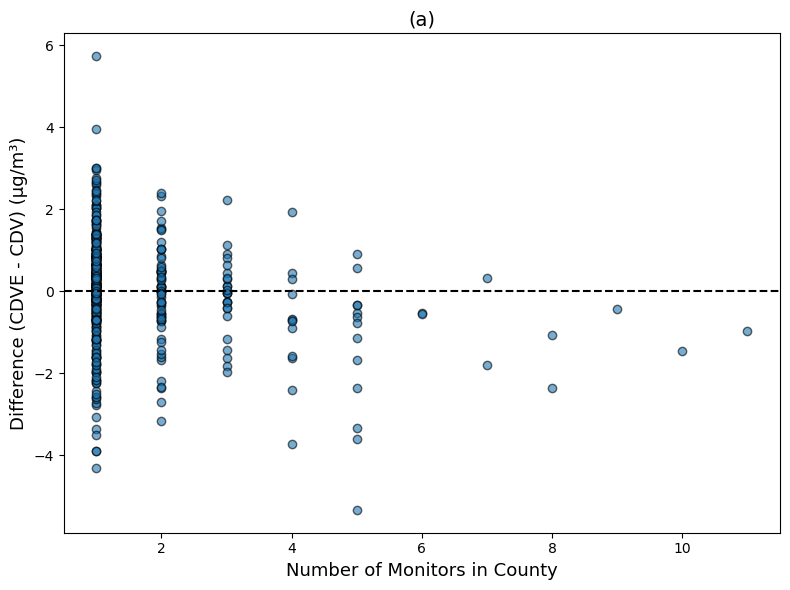

In [45]:
import matplotlib.pyplot as plt

x = counties_with_monitor_counts['monitor_count']
y = counties_with_monitor_counts['diff']  # Assuming 'diff' = CDVE - CDV

plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.6, edgecolors='k')
plt.axhline(0, linestyle='--', color='black')

plt.xlabel('Number of Monitors in County', fontsize=13)
plt.ylabel('Difference (CDVE - CDV) (µg/m³)', fontsize=13)
plt.title('(a)', fontsize=14)

plt.grid(False)
plt.tight_layout()
plt.show()


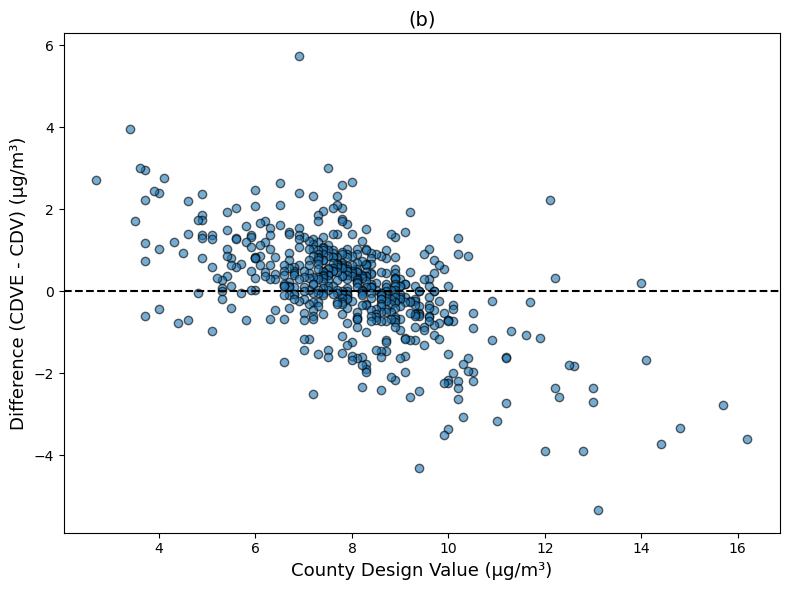

In [43]:
import matplotlib.pyplot as plt

x = counties_with_monitor_counts['Design Value']
y = counties_with_monitor_counts['diff']  # Assuming 'diff' = CDVE - CDV

plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.6, edgecolors='k')
plt.axhline(0, linestyle='--', color='black')


plt.xlabel('County Design Value (µg/m³)', fontsize=13)
plt.ylabel('Difference (CDVE - CDV) (µg/m³)', fontsize=13)
plt.title('(b)', fontsize=14)

plt.grid(False)
plt.tight_layout()
plt.show()


In [19]:
df = gpd.read_file('/data/acker/ALA/paper2/GL_2021-2023_grids.shp')
df

,value,lat,lon,geometry
0,15.533333,10.005000,-85.724998,"POLYGON ((-85.725 10.005, -85.725 10.015, -85...."
1,15.666667,10.005000,-85.714996,"POLYGON ((-85.715 10.005, -85.715 10.015, -85...."
2,15.666667,10.005000,-85.705002,"POLYGON ((-85.705 10.005, -85.705 10.015, -85...."
3,14.700000,10.005000,-85.695000,"POLYGON ((-85.695 10.005, -85.695 10.015, -85...."
4,14.266666,10.005000,-85.684998,"POLYGON ((-85.685 10.005, -85.685 10.015, -85...."
...,...,...,...,...
25002341,1.400000,67.985001,-51.395000,"POLYGON ((-51.395 67.985, -51.395 67.995, -51...."
25002342,1.400000,67.985001,-51.384998,"POLYGON ((-51.385 67.985, -51.385 67.995, -51...."
25002343,1.400000,67.985001,-51.375000,"POLYGON ((-51.375 67.985, -51.375 67.995, -51...."
25002344,1.400000,67.985001,-51.355000,"POLYGON ((-51.355 67.985, -51.355 67.995, -51...."


In [20]:
df = df.to_crs(epsg=4269)

In [21]:
joined = gpd.sjoin(df, counties_with_monitor_counts, how='left', predicate='intersects')
joined

,value,lat,lon,geometry,index_right0,index,GEOID,PM25_90th,STATEFP,COUNTYFP,CDVE_rank,ID,Design Value,diff,classification,monitor_count
0,15.533333,10.005000,-85.724998,"POLYGON ((-85.725 10.005, -85.725 10.015, -85....",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,15.666667,10.005000,-85.714996,"POLYGON ((-85.715 10.005, -85.715 10.015, -85....",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,15.666667,10.005000,-85.705002,"POLYGON ((-85.705 10.005, -85.705 10.015, -85....",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,14.700000,10.005000,-85.695000,"POLYGON ((-85.695 10.005, -85.695 10.015, -85....",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,14.266666,10.005000,-85.684998,"POLYGON ((-85.685 10.005, -85.685 10.015, -85....",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25002341,1.400000,67.985001,-51.395000,"POLYGON ((-51.395 67.985, -51.395 67.995, -51....",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25002342,1.400000,67.985001,-51.384998,"POLYGON ((-51.385 67.985, -51.385 67.995, -51....",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25002343,1.400000,67.985001,-51.375000,"POLYGON ((-51.375 67.985, -51.375 67.995, -51....",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25002344,1.400000,67.985001,-51.355000,"POLYGON ((-51.355 67.985, -51.355 67.995, -51....",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
grids = joined.dropna(subset=['value','GEOID'])

In [28]:
grids = grids.drop(columns=['index_right0'])

In [29]:
monitors_with_grid = gpd.sjoin(valid, grids, how="inner", predicate="within")

# Now each monitor has the grid cell + county info it falls within


In [31]:
total_grids_per_county = grids.groupby('GEOID').size().reset_index(name='total_grids')


In [32]:
# Keep unique grid geometries with monitors
grids_with_monitor = monitors_with_grid.drop_duplicates(subset='geometry')

# Count how many unique grid cells have a monitor in each county
monitor_grids_per_county = grids_with_monitor.groupby('GEOID').size().reset_index(name='grids_with_monitor')


In [34]:
coverage_df = total_grids_per_county.merge(monitor_grids_per_county, on='GEOID', how='left')
coverage_df['grids_with_monitor'] = coverage_df['grids_with_monitor'].fillna(0)

coverage_df['monitor_coverage_pct'] = 100 * coverage_df['grids_with_monitor'] / coverage_df['total_grids']


In [49]:
coverage_df['monitor_coverage_pct'].describe()

count    536.000000
mean       0.102089
std        0.176742
min        0.000000
25%        0.035047
50%        0.058360
75%        0.089646
max        1.746725
Name: monitor_coverage_pct, dtype: float64

In [36]:
final_df = counties_with_monitor_counts.merge(coverage_df, on='GEOID', how='left')

final_df

,index,GEOID,PM25_90th,STATEFP,COUNTYFP,CDVE_rank,ID,Design Value,geometry,diff,classification,monitor_count,total_grids,grids_with_monitor,monitor_coverage_pct
0,0,02090,14.333333,02,090,1,02_090,12.1,"POLYGON ((-148.66326 64.59079, -148.64821 64.5...",2.233333,TP,3,37073,3.0,0.008092
1,1,06063,14.200000,06,063,2,06_063,14.0,"POLYGON ((-121.49703 40.43702, -121.49487 40.4...",0.200000,TP,1,7358,1.0,0.013591
2,2,06107,12.933334,06,107,4,06_107,15.7,"POLYGON ((-119.56647 36.49434, -119.56366 36.4...",-2.766666,TP,1,12847,1.0,0.007784
3,3,06023,12.633334,06,023,5,06_023,6.9,"POLYGON ((-124.4086 40.4432, -124.39664 40.462...",5.733334,FN,1,10107,1.0,0.009894
4,4,06029,12.599999,06,029,6,06_029,16.2,"POLYGON ((-120.19437 35.78936, -120.00308 35.7...",-3.600001,TP,5,21363,5.0,0.023405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
531,531,02020,4.133333,02,020,3118,02_020,5.1,"MULTIPOLYGON (((-150.07348 61.15834, -150.0691...",-0.966667,TN,1,4942,1.0,0.020235
532,532,02110,3.900000,02,110,3128,02_110,4.6,"MULTIPOLYGON (((-134.66932 58.33327, -134.6675...",-0.700000,TN,1,5378,1.0,0.018594
533,533,15001,3.633333,15,001,3133,15_001,4.4,"POLYGON ((-156.06147 19.72813, -156.06076 19.7...",-0.766667,TN,5,9120,5.0,0.054825
534,534,15009,3.556667,15,009,3136,15_009,4.0,"MULTIPOLYGON (((-156.69742 20.91637, -156.6957...",-0.443333,TN,1,2784,1.0,0.035920


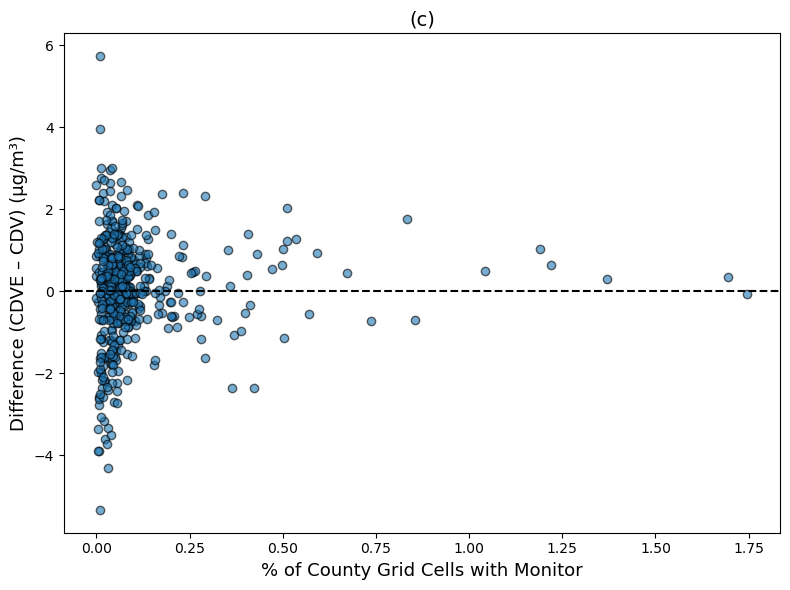

In [46]:
import matplotlib.pyplot as plt

x = final_df['monitor_coverage_pct']
y = final_df['diff']

plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.6, edgecolors='k')
plt.axhline(0, linestyle='--', color='black')

plt.xlabel('% of County Grid Cells with Monitor', fontsize=13)
plt.ylabel('Difference (CDVE – CDV) (µg/m³)', fontsize=13)
plt.title('(c)', fontsize=14) #Agreement vs. Spatial Coverage of Monitors
plt.grid(False)
plt.tight_layout()
plt.show()
